# 1. Test TensorFlow imports



In [1]:
import tensorflow as tf

from keras import models
from keras import layers
from keras import regularizers

from keras.layers import Input, Dense
from keras.layers import Dense
from keras.layers import Dropout

from keras.models import Model
from keras.models import Sequential

from keras.datasets import fashion_mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt

# 2. Test TensorFlow with Lin. Reg.

In [2]:
import numpy as np
#Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

XT = tf.transpose(X)

theta = tf.matmul(tf.matmul(tf.linalg.inv(tf.matmul(XT, X)), XT), y)

print(theta)

tf.Tensor(
[[-3.7144665e+01]
 [ 4.3637392e-01]
 [ 9.3933418e-03]
 [-1.0714764e-01]
 [ 6.4542186e-01]
 [-4.1016874e-06]
 [-3.7816020e-03]
 [-4.2341197e-01]
 [-4.3682083e-01]], shape=(9, 1), dtype=float32)


# 3. Test TensorFlow with MNIST (handwriting) dataset

## Load the MNIST dataset

4422102/4422102 [==============================] - 0s 0us/step


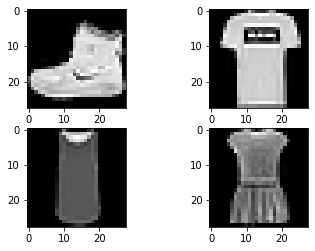

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

## Format data

In [4]:
# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Define mode


In [18]:
m = {'reg':0.007, 'drop':0.5, 'base':None}
m_keys = list(m.keys())
mode = m_keys[2]        # 0 = regularization, 1 = dropout, 2 = baseline

In [19]:
mode, m[mode]

('base', None)

## define model

In [20]:
# define network model
network = Sequential()

if mode == 'reg':               # regularization network model
  reg = m[mode]
  network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(reg), 
                          activation='relu', input_shape=(28 * 28,)))
  network.add(layers.Dense(10, activation='softmax'))
  # complile
  network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # plotting
  plt_title = str(reg)+' regularization factor'

elif mode == 'drop':              # dropout rate model
  drop = m[mode]
  network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
  network.add(layers.Dropout(drop))
  network.add(layers.Dense(10, activation='softmax'))
  # complile
  network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # plotting
  plt_title = str(drop)+' dropout rate'

else:                         # baseline model
  network.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  #  model.add(Dense(num_pixels/2, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  network.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
  network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  # plotting
  plt_title = 'baseline model'

## build and fit

In [21]:
# build the model
model = network
# Fit the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=10, batch_size=200, verbose=2)

history_dict = history.history

Epoch 1/10
300/300 - 11s - loss: 0.5099 - accuracy: 0.8232 - val_loss: 0.4258 - val_accuracy: 0.8494 - 11s/epoch - 35ms/step
Epoch 2/10
300/300 - 5s - loss: 0.3755 - accuracy: 0.8658 - val_loss: 0.3671 - val_accuracy: 0.8699 - 5s/epoch - 17ms/step
Epoch 3/10
300/300 - 6s - loss: 0.3371 - accuracy: 0.8793 - val_loss: 0.3621 - val_accuracy: 0.8672 - 6s/epoch - 21ms/step
Epoch 4/10
300/300 - 5s - loss: 0.3064 - accuracy: 0.8883 - val_loss: 0.3575 - val_accuracy: 0.8687 - 5s/epoch - 18ms/step
Epoch 5/10
300/300 - 6s - loss: 0.2854 - accuracy: 0.8961 - val_loss: 0.3594 - val_accuracy: 0.8724 - 6s/epoch - 20ms/step
Epoch 6/10
300/300 - 5s - loss: 0.2735 - accuracy: 0.8985 - val_loss: 0.3296 - val_accuracy: 0.8808 - 5s/epoch - 18ms/step
Epoch 7/10
300/300 - 5s - loss: 0.2534 - accuracy: 0.9066 - val_loss: 0.3259 - val_accuracy: 0.8788 - 5s/epoch - 18ms/step
Epoch 8/10
300/300 - 6s - loss: 0.2469 - accuracy: 0.9092 - val_loss: 0.3209 - val_accuracy: 0.8842 - 6s/epoch - 20ms/step
Epoch 9/10
300

## evaluate final model and plot loss

In [22]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 12.05%


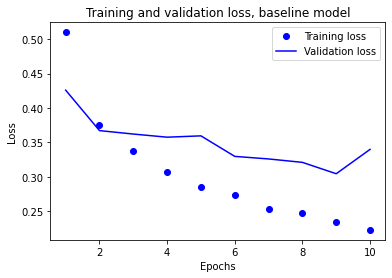

In [23]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss, '+plt_title)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()